# Titanic Survival Analysis
https://www.kaggle.com/competitions/titanic/data

## Dataset
**Source:** Kaggle Titanic Dataset.

## Project Overview
The Titanic was one of the most infamous destruction in history. On 15.4.1912, during her maiden journey, the Titanic collided with an iceberg and sank. Tragically, there weren't enough lifeboats for all passengers and crew, resulting in significant loss of life. While survival involved elements of luck, certain groups of people were statistically more likely to survive than others.

## Research Question
**What types of people were more likely to survive?**
Analysis focuses on factors such as:
- Passenger class (economic status).
- Gender.
- Age.
- Family size.
- Fare paid.
- Embarkation port.


In [1]:
# Data manipulation

import numpy as np
import pandas as pd

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

# Model selection and evaluation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Preprocessing

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer


# Ignoring warnings

import warnings
warnings.filterwarnings('ignore')




In [2]:
# Data loading

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Display the first 5 rows of the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Column Descriptions

- **PassengerId**  
  A unique identifier assigned to each passenger.

- **Survived**  
  Survival status of the passenger.  
  - `0` = Did not survive.  
  - `1` = Survived.

- **Pclass**  
  Passenger class, which is a proxy for socio-economic status.  
  - `1` = First class.  
  - `2` = Second class.  
  - `3` = Third class.

- **Name**  
  Full name of the passenger, including title.

- **Sex**  
  Gender of the passenger (`male` or `female`).

- **Age**  
  Age of the passenger in years.  

- **SibSp**  
  Number of siblings or spouses the passenger had aboard the Titanic.

- **Parch**  
  Number of parents or children the passenger had aboard the Titanic.

- **Ticket**  
  Ticket number assigned to the passenger.

- **Fare**  
  Amount of money the passenger paid for the ticket.

- **Cabin**  
  Cabin number where the passenger stayed.  

- **Embarked**  
  Port where the passenger boarded the Titanic.  
  - `C` = Cherbourg.  
  - `Q` = Queenstown.  
  - `S` = Southampton.


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Key findings from .info():**
- Age: 177 missing values
- Cabin: 687 missing values  
- Embarked: 2 missing values

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



**Key Statistical Insights:**
- Age: 20% missing (177 values). Mostly young people on board.
- Survival: 38% rate: class imbalance present.
- Socio economic status: Majority 3rd class passengers.
- Wealth disparity: Fare ranges from £0 to £512 (Diverse Fare).

In [5]:
train.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


### **Key Findings:**
1. **Gender Distribution**
   - Male: 577 passengers (65%).
   - Female: 314 passengers (35%).
   - **Insight:** Male dominated passenger list.

2. **Embarkation Ports**
   - Southampton (S): 644 passengers (72%).
   - **Note:** 2 missing values from Embarked column.

3. **Cabin Data Quality**
   - Only 204 of 891 cabins recorded (23% coverage).
   - **Decision:** Can be categorized later.

4. **Ticket Patterns**
   - 681 unique tickets for 891 passengers.
   - **Implication:** Group/family bookings present.


# 📊 Grouped Survival Analysis

In this section, I systematically analyze how different passenger characteristics relate with survival rates.

In [6]:
train.groupby('Pclass')['Survived'].apply(np.mean).reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## 📈 Survival by Passenger Class (Pclass)

**Observation:** Survival rate decreases dramatically with lower passenger class:
- **1st Class:** 63% survival → Privileged access to lifeboats.
- **2nd Class:** 47% survival → Moderate advantage.
- **3rd Class:** 24% survival → Working class disadvantage.

**Insight:** Socio-economic status was a primary survival determinant, with 1st class passengers more likely to survive than 3rd class.

In [7]:
train.groupby('Sex')['Survived'].apply(np.mean).reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## 📈 Survival by Sex

**Observation:** Survival rate of female pessengers is way higher than male:
- **Female:** 74% survival.
- **Male:** ~19% survival.

**Insight:** Women and Children are first priortity to rescue.

In [8]:
train.groupby('SibSp')['Survived'].apply(np.mean).reset_index()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## 👨‍👩‍👧‍👦 Survival by Family Size (SibSp:Siblings/Spouses)

**Observation:** Passengers traveling with 1 sibling/spouse had the highest survival rate:
- **0 SibSp:** 34.5% survival (traveling alone).
- **1 SibSp:** 53.6% survival (optimal family size for evacuation).
- **2+ SibSp:** Decreasing survival with larger groups.

**Key Insights:**
1. **Moderate family advantage** Having 1/2 sibling/spouse increased survival rate.
2. **Group disadvantage** - Larger families (3+ members) faced evacuation challenges
3. **Extreme cases** No survivors among passengers with 5 or 8 siblings/spouses aboard.

**Insight:** Family evacuation protocols may have prioritized smaller, more manageable groups over larger family units.

In [9]:
train.groupby('Parch')['Survived'].apply(np.mean).reset_index()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## 👨‍👧‍👦 Survival by Parents/Children (Parch)

**Observation:** Traveling with 1 parent/child yielded the highest survival rate:
- **0 Parch:** 34.4% survival
- **1 Parch:** 55.1% survival
- **2 Parch:** 50.0% survival
- **3+ Parch:** Volatile survival rates due to small sample sizes

**Key Insights:** Small family in advantage (maybe because of rescue operaions protocol).

In [10]:
train.groupby('Embarked')['Survived'].apply(np.mean).reset_index()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## 🚢 Survival by Embarkation Port

**Observation:** Cherbourg passengers had the highest survival rate:
- **Cherbourg (C):** 55.4% survival (French port, potentially wealthier passengers).
- **Queenstown (Q):** 38.9% survival (Irish port).
- **Southampton (S):** 33.7% survival (main departure port, largest passenger group).

**Key Insights:**
1. **Port correlation with class** - Cherbourg passengers may have been wealthier (more 1st class).
2. **Boarding order effect** - Earlier boarding (Cherbourg) may have provided better cabin locations.
3. **Nationality patterns** - Different ports served different passenger demographics.

## 🔧 Feature Engineering: Family Size

### **Problem with Current Features:**
Currently, family relationships are split into two separate columns:
- `SibSp`: Count of siblings/spouses aboard.
- `Parch`: Count of parents/children aboard.

**Limitation:** These don't capture the complete family unit traveling together.

### **Solution: Create `FamilySize` Feature**
Combine both metrics plus the passenger themselves to get total family members on board:

**Formula:** `FamilySize = SibSp + Parch + 1`.


In [11]:
train = train.assign(FamilySize = train["SibSp"] + train["Parch"] + 1)
test = test.assign(FamilySize = test["SibSp"] + test["Parch"] + 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
train.groupby('FamilySize')['Survived'].apply(np.mean).reset_index()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


## 👨‍👩‍👧‍👦 Family Size Analysis

**Small families (2-4 members)** had highest survival, suggesting coordinated evacuation advantage.

**Solo travelers** had lowest survival (30%), lacking family assistance.

**Large families (7+)** struggled with evacuation coordination.


## 🏷️ Feature Transformation: Family Size Categories

**Transform numerical family sizes into meaningful categorical groups:**


In [13]:
family_map = {1: "Alone", 2: "Small", 3: "Small", 4: "Small", 5: "Medium", 6: "Medium", 7: "Large", 8: "Large", 11: "Large"}
train['Family_Size_Groupping']= train['FamilySize'].map(family_map)
test['Family_Size_Groupping']= test['FamilySize'].map(family_map)


In [15]:
train.groupby('Family_Size_Groupping')['Survived'].apply(np.mean).reset_index()

,Family_Size_Groupping,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


## 📊 Age Distribution by Survival

**Visualizing age patterns** for survivors vs non-survivors using 10-year bins.


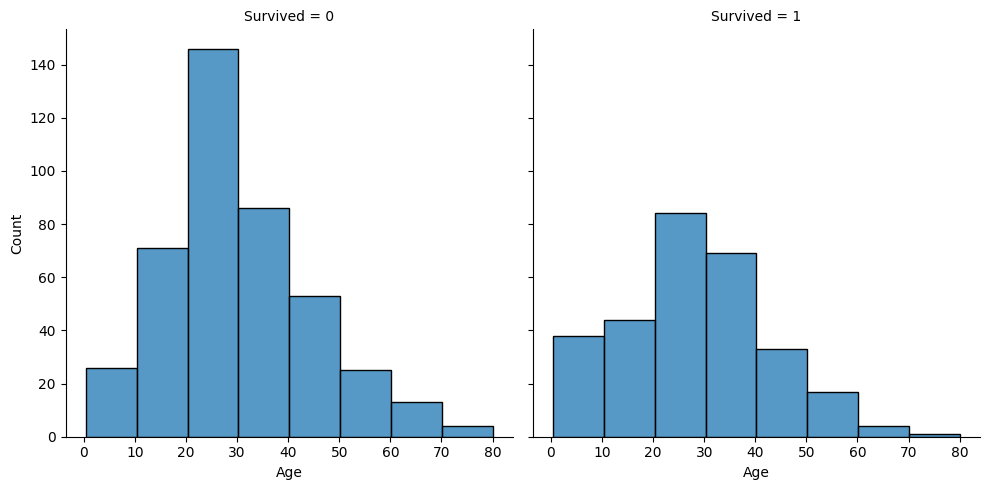

In [14]:
# Create distribution plots of Age separated by Survival status
# train: dataset, x="Age": feature to plot, col="Survived": separate plots for died(0) vs survived(1)
# binwidth=10: Group ages in 10-year bins (0-10, 10-20, etc.), height=5: plot height in inches
sns.displot(train, x="Age", col="Survived", binwidth=10, height=5)

**Observation:** Children (0-10 age bin) show higher survival, confirming "women and children first" policy.

Young adults (20-30) distribution differs between groups, suggesting they are helping in evacuation process.

## 📊 Age Grouping: Smart Bins

**Problem:** Most passengers are young, few are old.

**Solution:** Create 8 age groups with equal number of passengers in each.

**Why:** Every age group has enough people for fair analysis.

In [15]:
# qcut: Creates bins where each has ~same number of samples, better than equal-width bins for skewed data
# 8 categories: Divides Age into 8 groups with equal frequency (~12.5% of data in each)
train["Age_Cut"] = pd.qcut(train['Age'], 8)
test["Age_Cut"] = pd.qcut(test['Age'], 8)

In [16]:
train.groupby('Age_Cut')['Survived'].apply(np.mean).reset_index()

,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


## 📊 Age Analysis Results

**Key Finding:** Children (0.4-16 years) had highest survival at 55%.

**Pattern:** Survival rates vary across age groups, with children prioritized during evacuation.

In [17]:
# Define bin edges and labels
age_bins = [0.419, 16, 20.125, 24, 28, 32.312, 38, 47, 80, float('inf')]
age_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Apply to both train and test
train['Age_binned'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=True)
test['Age_binned'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, right=True)
print("Is 'Age_binned' in columns?", 'Age_binned' in train.columns)

Is 'Age_binned' in columns? True


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Size_Groupping,Age_Cut,Age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]",5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]",3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]",5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]",5


## 💰 Fare Disribution Plot

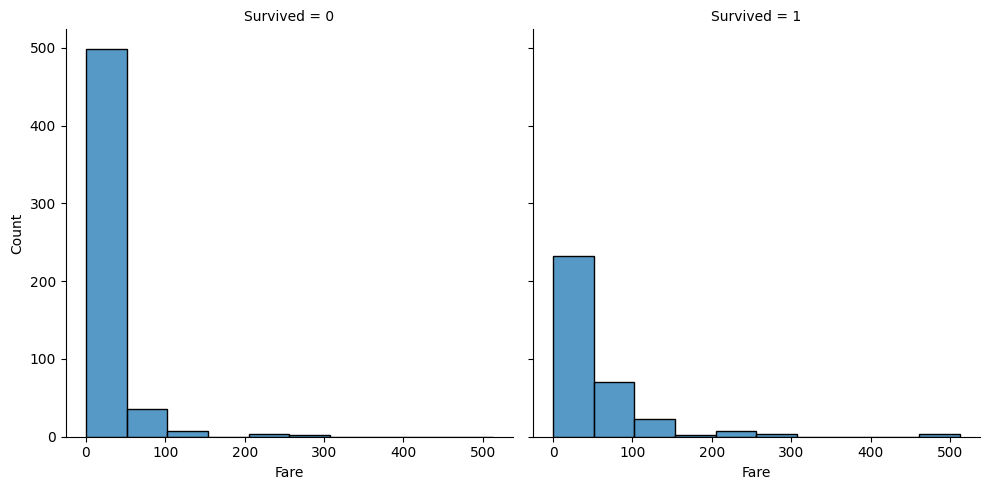

In [19]:
sns.displot(train, x="Fare", col="Survived", binwidth=50, height=5)

## 💰 Fare Analysis & Binning

**Problem:** Fare prices are highly skewed (most cheap, few very expensive).

**Solution:** Group fares into 6 price ranges based on quantile analysis.

**Why:** Create meaningful fare categories that reflect passenger wealth tiers.

In [20]:
train['Fare_Cut'] = pd.qcut(train['Fare'], 6)
test['Fare_Cut'] = pd.qcut(test['Fare'], 6)

In [21]:
train.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [22]:
# Define bin edges and labels for Fare based on quantile analysis
fare_bins = [-0.001, 7.775, 8.662, 14.454, 26, 52.369, 512.329, float('inf')]
fare_labels = [0, 1, 2, 3, 4, 5, 6]

# Apply to both train and test
train['Fare_binned'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels, right=True)
test['Fare_binned'] = pd.cut(test['Fare'], bins=fare_bins, labels=fare_labels, right=True)

print("Is 'Fare_binned' in columns?", 'Fare_binned' in train.columns)
print("Sample Fare vs Fare_binned:")
print(train[['Fare', 'Fare_binned']].head())

Is 'Fare_binned' in columns? True
Sample Fare vs Fare_binned:
      Fare Fare_binned
0   7.2500           0
1  71.2833           5
2   7.9250           1
3  53.1000           5
4   8.0500           1


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Size_Groupping,Age_Cut,Age_binned,Fare_Cut,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]",2,"(-0.001, 7.775]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]",5,"(52.369, 512.329]",5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]",3,"(7.775, 8.662]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]",5,"(52.369, 512.329]",5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]",5,"(7.775, 8.662]",1


In [24]:
train['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


## 👑 Extract Titles from Names

**Objective:** Extract social titles (Mr, Mrs, Miss, Master, etc.) from passenger names.

**Why:** Titles reveal hidden information about gender, marital status, age, and social class that can impact survival rates.

**Expected Insights:** Different titles may show distinct survival patterns (e.g., "Mrs" vs "Miss", "Master" for children).

In [25]:
train['Title']=train['Name'].str.split(pat=', ', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())
test['Title']=test['Name'].str.split(pat=', ', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())

In [26]:
train.groupby(["Title"], as_index=False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


### Title Grouping Rules
- **Military**: Capt, Col, Major  
- **Noble**: Jonkheer, the Countess, Don, Lady, Sir, Mlle, Ms, Mme  

This helps the model learn better patterns.

In [27]:
train["Title"]= train ['Title'].replace(['Capt', 'Col', 'Major'], 'Military')
train["Title"]= train ['Title'].replace(['Jonkheer', 'the Countess', 'Don', 'Lady', 'Sir', "Mlle", "Ms", "Mme"], 'Noble')


test["Title"]= test ['Title'].replace(['Capt', 'Col', 'Major'], 'Military')
test["Title"]= test ['Title'].replace(['Jonkheer', 'the Countess', 'Don', 'Lady', 'Sir', "Mlle", "Ms", "Mme"], 'Noble')


In [28]:
train.groupby('Title')['Survived'].apply(np.mean).reset_index()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Military,0.400000
3,Miss,0.697802
4,Mr,0.156673
5,Mrs,0.792000
6,Noble,0.777778
7,Rev,0.000000


## 📏 Name Length Feature

**Hypothesis:** Name length may correlate with social status and survival probability.

**Reasoning:**
- **Longer names**: Formal titles, aristocracy, wealthier passengers.
- **Shorter names**: Working class, immigrants, simpler backgrounds.

**Goal:** Test if name character count provides predictive signal for survival rates.

In [29]:
train["Name_Length"] = train["Name"].apply(lambda x: len(x))
test["Name_Length"] = test["Name"].apply(lambda x: len(x))
# e.g x as a name .. lambda take x as a name and return the lenghth of that x function, which is name in our case

print("Is 'Name_Length' in columns?", 'Name_Length' in train.columns)
print("Is 'Name_Length' in columns?", 'Name_Length' in test.columns)


Is 'Name_Length' in columns? True
Is 'Name_Length' in columns? True


## 📊 Name Length Distribution by Survival

**Visualization:** Kernel Density Estimate (KDE) plot comparing name length distributions for survivors vs non-survivors.


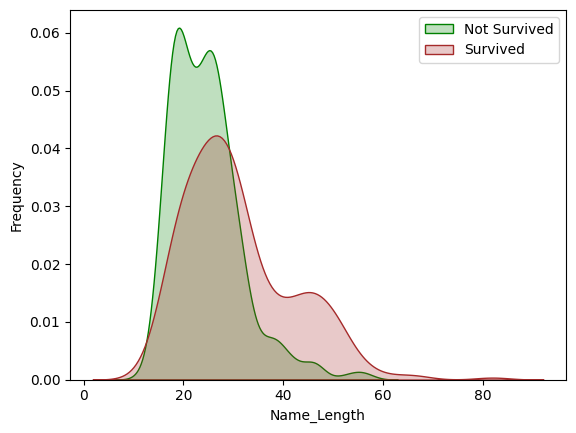

In [30]:
g = sns.kdeplot(train['Name_Length'][(train['Survived']==0) & (train['Name_Length'].notnull())], color='Green', fill=True)
g = sns.kdeplot(train['Name_Length'][(train['Survived']==1) & (train['Name_Length'].notnull())], ax=g, color='Brown', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

## 📊 KDE Plot: Name Length vs Survival

**Visualization:** Comparing name length distributions for survivors (brown) and non-survivors (green).

**Observations:**
- Both distributions show similar shape and overlap.
- No clear separation between survivor groups.
- Differences in peak locations exist.

**Conclusion:** Name length alone doesn't strongly differentiate survivors, but combined with other features may provide subtle predictive signal.

In [31]:
train['Name_LengthGB'] = pd.qcut(train['Name_Length'], 8)
test['Name_LengthGB'] = pd.qcut(test['Name_Length'], 8)

## 📊 Name Length Quantile Binning

**Action:** Group name lengths into 8 equal-frequency categories using `pd.qcut()`.

**Purpose:** Create balanced groups for survival analysis regardless of name length distribution skew.

**Benefit:** Each category contains ~12.5% of passengers, ensuring statistical reliability across all name length percentiles.

Total passengers = 891.
Number of groups = 8.
Passengers per group = 891 ÷ 8 = 111.375 ≈ 111 passengers.

## 📊 How `pd.qcut()` Creates Equal-Frequency Groups

**Process:**
1. **Sort** all 891 passengers by name length (shortest to longest).
2. **Divide** into 8 equal piles:
   - Pile 1: Passengers 1-111 (shortest 12.5%).
   - Pile 2: Passengers 112-222 (next 12.5%).
   - Pile 3: Passengers 223-333 (next 12.5%).
   - Pile 4: Passengers 334-444 (next 12.5%).
   - Pile 5: Passengers 445-555 (next 12.5%).
   - Pile 6: Passengers 556-666 (next 12.5%).
   - Pile 7: Passengers 667-777 (next 12.5%).
   - Pile 8: Passengers 778-891 (longest 12.5%).

**Result:** Each group contains approximately 111 passengers, regardless of actual name length ranges.

In [32]:
train.groupby('Name_LengthGB')['Survived'].apply(np.mean).reset_index()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [33]:
# Define bins based on your ranges
name_length_bins = [11.999, 18, 20, 23, 25, 27.25, 30, 38, 82, float('inf')]
name_length_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Apply to both datasets
train['Name_Size'] = pd.cut(train['Name_Length'], bins=name_length_bins, labels=name_length_labels, right=True)
test['Name_Size'] = pd.cut(test['Name_Length'], bins=name_length_bins, labels=name_length_labels, right=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Family_Size_Groupping,Age_Cut,Age_binned,Fare_Cut,Fare_binned,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,Small,"(20.125, 24.0]",2,"(-0.001, 7.775]",0,Mr,23,"(20.0, 23.0]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,Small,"(32.312, 38.0]",5,"(52.369, 512.329]",5,Mrs,51,"(38.0, 82.0]",7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Alone,"(24.0, 28.0]",3,"(7.775, 8.662]",1,Miss,22,"(20.0, 23.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,Small,"(32.312, 38.0]",5,"(52.369, 512.329]",5,Mrs,44,"(38.0, 82.0]",7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,Alone,"(32.312, 38.0]",5,"(7.775, 8.662]",1,Mr,24,"(23.0, 25.0]",3


In [35]:
train['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [36]:
# Simpler and correct: skipping prefix, only considering ticket number in 'TicketNumber'
train['TicketNumber'] = train['Ticket'].apply(lambda x: x.split()[-1])
test['TicketNumber'] = test['Ticket'].apply(lambda x: x.split()[-1])

In [37]:
train.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

,TicketNumber,count,mean
94,1601,7,0.714286
196,2343,7,0.000000
464,347082,7,0.000000
468,347088,6,0.000000
358,3101295,6,0.000000
...,...,...,...
276,2667,1,1.000000
278,2669,1,0.000000
279,26707,1,0.000000
280,2671,1,0.000000


In [38]:
train['TicketNumber']

,TicketNumber
0,21171
1,17599
2,3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,6607
889,111369


## 🎫 Ticket Sharing Analysis Benefits

### ✅ Why Check Shared Tickets?
- **Identifies groups/families** traveling together.
- **Reveals group survival patterns** (help/rescue dynamics).
- **Creates new features**: `TicketGroupSize`, `IsAloneOnTicket`.

### 📊 From Output:
- **Ticket 1601**: 7 people, 71% survived (2 died).
- **Ticket 347082**: 7 people, all died (0%).
- **Most tickets**: Solo travelers (count=1).

### 🎯 Value:
Creates **group based features** that improve survival prediction accuracy.

In [39]:
train.groupby('TicketNumber')['TicketNumber'].transform("count")

,TicketNumber
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


# .transform('count')

**What it does:**
- Counts rows in each group (e.g., by `TicketNumber`)
- Returns a **new column** where **each row** shows its group size
- Keeps original DataFrame length


In [40]:
train['TicketNumberCounts'] =train.groupby('TicketNumber')['TicketNumber'].transform("count")
test['TicketNumberCounts'] =train.groupby('TicketNumber')['TicketNumber'].transform("count")

In [41]:
train.groupby('TicketNumberCounts')['Survived'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

,count,mean
TicketNumberCounts,,
1,544,0.295956
2,188,0.569149
3,66,0.712121
4,44,0.500000
7,21,0.238095
6,18,0.000000
5,10,0.000000


In [42]:
train['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [43]:
train['TicketLocation']=np.where(train['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test['TicketLocation']=np.where(test['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [44]:
train['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,665
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
A/5.,7


In [45]:
train['TicketLocation'] = train['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

test['TicketLocation'] = test['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

# Data Cleaning: Ticket Location

## Problem
- Ticket locations had inconsistent formatting (e.g., `SC/Paris`, `SC./PARIS`, `S.C./PARIS`)
- Same location appeared as different categories

## Solution
Standardized all variations to consistent formats:
- Removed extra punctuation
- Standardized capitalization
- Fixed common abbreviations

## Result
- Clean, consistent categories
- Better for grouping & analysis
- More reliable feature for modeling

In [46]:
train.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


# Ticket Location Analysis

## Summary
- Most tickets (665) are **Blank** → 38.3% survival.
- Ticket codes show **extreme variability** in survival rates.
- Limited predictive power due to sparse data.

## Key Patterns
**High Survival (>65%):**
- `S.W./PP`: 100% (1 passenger).
- `PC`: 65% (60 passengers).
- `PP`: 66.7% (3 passengers).

**Low Survival (0%):**
- 15 different codes had 0% survival.
- Most have ≤3 passengers each.

**Medium Survival:**
- `Blank`: 38.3% (665 passengers).
- `CA`: 34.1% (41 passengers).

## Conclusion
**Limited usefulness for modeling:**
- Too many unique codes (27+).
- Most codes have very few passengers.
- Sample sizes too small for reliable patterns.
- `Blank` dominates (74% of data).

**Action:**
This feature may be skipped or aggregated into broader categories. Further research needed but currently deprioritized.

In [47]:
train['Cabin'] = train['Cabin'].fillna('U')
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train['Cabin']])

test['Cabin'] = test['Cabin'].fillna('U')
test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test['Cabin']])

# Cabin Feature Processing

## Goal
Extract deck letter from cabin numbers.

## Process
1. **Fill NaN** with `'U'` (Unknown).
2. **Extract first letter** of cabin (e.g., `C85` → `C`).
3. **Handle edge case**: Keep `'x'` if somehow still null.

## Result
- `Cabin` column now contains **single letters**.
- Example: `B57` → `B`, `D20` → `D`, missing → `U`.

## Why
- **Deck location** affects survival.
- Simplifies analysis from specific cabin to general area.

In [48]:
train.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [49]:
train['Cabin_Assigned'] = train['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test['Cabin_Assigned'] = test['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [50]:
train.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


# Cabin Analysis & Feature Creation

## Deck Analysis
- **8 decks** identified (0-8, though 0 is likely data issue).
- **Deck 8** (687 passengers): Low survival (30%).
- **Other decks** (1-7): High survival (47-76%).
- **Deck 7** has only 1 passenger → unreliable.

## Key Insight
- **Cabin vs No Cabin** matters more than specific deck.

## New Feature Created
`Cabin_Assigned`:
- `0` = No cabin recorded (U) → 30% survival.
- `1` = Has cabin → 67% survival.

## Result
Cabin availability is a **strong predictor** (2.2× survival rate).

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_Cut,Fare_binned,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(-0.001, 7.775]",0,Mr,23,"(20.0, 23.0]",2,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(52.369, 512.329]",5,Mrs,51,"(38.0, 82.0]",7,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(7.775, 8.662]",1,Miss,22,"(20.0, 23.0]",2,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(52.369, 512.329]",5,Mrs,44,"(38.0, 82.0]",7,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(7.775, 8.662]",1,Mr,24,"(23.0, 25.0]",3,373450,1,Blank,0


In [52]:
train.shape

(891, 26)

In [53]:
test.shape

(418, 25)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    int64   
 3   Name                   891 non-null    object  
 4   Sex                    891 non-null    object  
 5   Age                    714 non-null    float64 
 6   SibSp                  891 non-null    int64   
 7   Parch                  891 non-null    int64   
 8   Ticket                 891 non-null    object  
 9   Fare                   891 non-null    float64 
 10  Cabin                  891 non-null    object  
 11  Embarked               889 non-null    object  
 12  FamilySize             891 non-null    int64   
 13  Family_Size_Groupping  891 non-null    object  
 14  Age_Cut                714 non-null    cat

In [55]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

# Data Preprocessing

## Missing Value Handling

### Age
- **Method**: Mean imputation.
- **Strategy**: Separate calculation for train and test sets.
- **Implementation**: Fill missing Age values with mean Age from respective .dataset

### Fare
- **Method**: Mean imputation.
- **Strategy**: Use training data mean for both datasets.
- **Implementation**: Fill missing Fare values with mean Fare from training data.

In [56]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [57]:
ode_cols = ['Family_Size_Groupping']
ohe_cols = ['Sex', 'Embarked']

# Feature Encoding Setup

## OneHotEncoder
**Variable**: `ohe`  
**Configuration**: `sparse_output=False`  
**Purpose**: Convert categorical variables to binary columns  
**Output**: Dense matrix format for easier manipulation

## OrdinalEncoder  
**Variable**: `ode`  
**Configuration**: Default parameters  
**Purpose**: Convert categorical variables to integer codes  
**Method**: Assigns integer values based on category ordering

## SimpleImputer
**Variable**: `SI`  
**Strategy**: `'most_frequent'`  
**Purpose**: Handle missing values in categorical features  
**Method**: Replaces missing values with the most frequent category

In [58]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']
X_test = test.copy()

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

# Data Splitting

**Split Ratio**: 80/20 (train/validation)  
**Stratification**: Maintains target distribution  
**Random State**: 21 for reproducibility  
**Output**: X_train, X_val, y_train, y_val

In [60]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

onehot_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1))
])

# Preprocessing Pipelines

## Ordinal Pipeline
1. **Impute**: Most frequent values
2. **Encode**: One-hot with unknown handling

## One-Hot Pipeline  
1. **Impute**: Most frequent values  
2. **Encode**: Ordinal with unknown placeholder (-1)

In [61]:
# ColumnTransformer to preprocess data: impute 'Age', encode ordinal and categorical columns,
# and pass through selected columns while dropping the rest
col_trans= ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('cord_pipeline' , ordinal_pipeline, ode_cols),
    ('onehot_pipeline', onehot_pipeline, ohe_cols),
    ('passthrough' , 'passthrough' , ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age'])

],
remainder='drop' ,
n_jobs=-1)

# ColumnTransformer Setup

**Purpose**: Unified feature processing  
**Components**:
- Age imputation
- Ordinal pipeline for specified columns
- One-hot pipeline for categorical features
- Passthrough for selected numeric features

**Configuration**:
- Remaining columns dropped
- Parallel processing enabled

In [62]:
lr = LogisticRegression()

In [63]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [64]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [65]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('cord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_Size_Groupping']),
                                                 ('onehot_pipeline',
                                                  Pipeline(...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [66]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 1.0}
0.8132276174529695


# Model Training Pipeline

## Logistic Regression Implementation

### Pipeline Components:
1. **ColumnTransformer** - Feature preprocessing pipeline
2. **GridSearchCV** - Hyperparameter optimization
3. **LogisticRegression** - Final classification model

### Hyperparameter Tuning:
- **Parameter**: Regularization strength (C)
- **Values Tested**: [100, 10, 1.0, 0.01, 0.001]
- **Cross-Validation**: 5-fold Stratified K-Fold

### Results:
- **Best Parameter**: C = 1.0
- **Cross-Validation Accuracy**: 81.32%

### Key Features:
- End-to-end automated preprocessing and training
- Maintains class distribution during validation
- Identifies optimal regularization strength

In [67]:
rfc = RandomForestClassifier()

In [68]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [69]:

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [70]:
# Create the complete processing pipeline:
# 1. col_trans: First, preprocess features (ColumnTransformer)
# 2. CV_rfc: Then, find best Random Forest with GridSearchCV
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
# Train the complete pipeline end-to-end:
# - Automatically applies preprocessing to training data
# - Searches for best hyperparameters via cross-validation
# - Returns the best trained model ready for predictions
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('cord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_Size_Groupping']),
                                                 ('onehot_pipeline',
                                                  Pipeline(...
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [96]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.8314882300797792


# Random Forest Model Results

## Best Configuration Found:
- **Criterion**: Gini impurity
- **Max Depth**: 10 levels
- **Min Samples per Leaf**: 6
- **Number of Trees**: 300

## Performance:
- **Cross-Validation Accuracy**: 83.09%
- **Pipeline**: ColumnTransformer → GridSearchCV → Optimized Model

## Key Insight:
The model performs best with moderate depth (10) and larger leaf sizes (6), suggesting balanced complexity for this dataset.

In [72]:
gnb = GaussianNB()

In [73]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [74]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [75]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('cord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_Size_Groupping']),
                                                 ('onehot_pipeline',
                                                  Pipeline(...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [76]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7768147345612135


# Gaussian Naive Bayes Results

## Best Parameter:
- **var_smoothing**: 1e-08

## Performance:
- **Cross-Validation Accuracy**: 77.68%

## Analysis:
The model achieves moderate performance with minimal variance smoothing, indicating stable probability estimates for this classification task.

In [77]:
GBC = GradientBoostingClassifier()

In [78]:
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [79]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid_gbc, cv=StratifiedKFold(n_splits=5))

In [80]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('cord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_Size_Groupping']),
                                                 ('onehot_pipeline',
                                                  Pipeline(...
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.01, 0.05, 0.1],
                                          'max_depth': [3, 4, 5],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 200, 300]}))])

In [81]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
0.8328572835615089


# Gradient Boosting Results

## Best Configuration:
- **Learning Rate**: 0.01 (slow, steady learning)
- **Max Depth**: 3 (shallow trees)
- **Min Samples per Leaf**: 2
- **Min Samples to Split**: 2  
- **Number of Trees**: 300

## Performance:
- **Cross-Validation Accuracy**: 83.29%

## Insight:
Achieves high accuracy with conservative settings - shallow trees and slow learning rate prevent overfitting while building strong ensemble.

In [82]:
dtc = DecisionTreeClassifier()

In [83]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [84]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [85]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('cord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_Size_Groupping']),
                                                 ('onehot_pipeline',
                                                  Pipeline(...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [86]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.8117994681374963


# Decision Tree Results

## Best Configuration:
- **Criterion**: Gini impurity
- **Max Depth**: 30 (deep tree)
- **Min Samples per Leaf**: 4
- **Min Samples to Split**: 10

## Performance:
- **Cross-Validation Accuracy**: 81.32%

## Insight:
Deep tree (30 levels) with moderate constraints achieves solid performance, though slightly lower than ensemble methods on this dataset.

In [87]:
knn = KNeighborsClassifier()

In [88]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [89]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [90]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('cord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_Size_Groupping']),
                                                 ('onehot_pipeline',
                                                  Pipeline(...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [91]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.7752683935782528


# K-Nearest Neighbors Results

## Best Configuration:
- **Algorithm**: Brute force
- **Neighbors**: 7
- **Distance Metric**: Manhattan (p=1)
- **Weighting**: Uniform

## Performance:
- **Cross-Validation Accuracy**: 77.53%

## Insight:
Simple distance-based approach with 7 neighbors using Manhattan distance performs moderately well for this classification task.

In [92]:
svc = SVC()

In [93]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [94]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [95]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('cord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_Size_Groupping']),
                                                 ('onehot_pipeline',
                                                  Pipeline(...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [97]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 100, 'kernel': 'rbf'}
0.8187924751305033


# Support Vector Classifier Results

## Best Configuration:
- **C**: 100 (low regularization)
- **Kernel**: RBF (Radial Basis Function)

## Performance:
- **Cross-Validation Accuracy**: 81.88%

## Insight:
RBF kernel with minimal regularization achieves strong performance, capturing complex non-linear patterns in the data.

In [98]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)

In [99]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': Y_pred6
})


In [100]:
# Generate predictions from all trained models
predictions = {
    'Random_Forest': pipefinalrfc.predict(X_test),
    'Decision_Tree': pipefinaldtc.predict(X_test),
    'KNN': pipefinalknn.predict(X_test),
    'SVM': pipefinalsvc.predict(X_test),
    'Gradient_Boosting': pipefinalgbc.predict(X_test),
    'Naive_Bayes': pipefinalgnb.predict(X_test)
}

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'PassengerId': test['PassengerId']
})

# Add predictions from each model
for model_name, preds in predictions.items():
    comparison_df[model_name] = preds

# FIX 1: Adjust display settings for wider table
pd.set_option('display.width', 120)  # Increase display width
pd.set_option('display.max_columns', None)  # Show all columns

# FIX 2: Use transposed display for better readability
print("Sample Predictions from Different Models (first 10 passengers):")
print(comparison_df.head(10).T)  # Transpose to show models as rows

# FIX 3: Or display with better formatting
print("\n\nAlternative display (models as columns):")
print(comparison_df.head(10).to_string())

# Show agreement between models
print("\n" + "="*60)
print("Complete Model Agreement Matrix:")
print("="*60)

model_names = list(predictions.keys())
for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        agreement = (comparison_df[model_names[i]] == comparison_df[model_names[j]]).mean()
        print(f"{model_names[i]:20} vs {model_names[j]:20}: {agreement:>7.2%} agreement")

# FIX 4: Create agreement matrix for better visualization
print("\n" + "="*60)
print("Agreement Matrix (Percentage):")
print("="*60)

# Create agreement matrix
agreement_matrix = pd.DataFrame(index=model_names, columns=model_names)

for i in range(len(model_names)):
    for j in range(len(model_names)):
        if i == j:
            agreement_matrix.iloc[i, j] = "100.00%"
        elif i < j:
            agreement = (comparison_df[model_names[i]] == comparison_df[model_names[j]]).mean()
            agreement_matrix.iloc[i, j] = f"{agreement:.2%}"
            agreement_matrix.iloc[j, i] = f"{agreement:.2%}"

print(agreement_matrix)

Sample Predictions from Different Models (first 10 passengers):
                     0    1    2    3    4    5    6    7    8    9
PassengerId        892  893  894  895  896  897  898  899  900  901
Random_Forest        0    0    0    0    1    0    1    0    1    0
Decision_Tree        0    0    0    0    1    0    0    0    1    0
KNN                  0    0    0    0    1    0    0    0    0    0
SVM                  0    1    0    0    1    0    1    0    1    0
Gradient_Boosting    0    0    0    0    1    0    1    0    1    0
Naive_Bayes          0    1    0    0    1    0    1    0    1    0


Alternative display (models as columns):
   PassengerId  Random_Forest  Decision_Tree  KNN  SVM  Gradient_Boosting  Naive_Bayes
0          892              0              0    0    0                  0            0
1          893              0              0    0    1                  0            1
2          894              0              0    0    0                  0            0
3